Test that convex approximation of the energy is always hypograph of the actual energy function

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import polyphase as phase
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pdb

In [3]:
# f = phase.polynomial_energy
f = lambda x : phase.flory_huggins(x, [5,5,1],[1,0.5,0.5])

# def f(x):    
#     scales = [10,20,400]
#     e =0
#     for si,xi in zip(scales, x):
#         e += si*((xi-0.1)**2)*((0.9-xi)**2)

#     return e

In [4]:
engine = phase.PHASE(f,100,3)
engine.compute(use_parallel=False, verbose=True, lift_label=True)

3-dimensional grid generated at 0.05s
Energy computed at 0.39s
Making energy manifold a paraboloid with 2x padding of 0.11 maximum energy
Energy is corrected at 0.57s
Convexhull is computed at 0.58s
Using 1.43E-01 as a threshold for Laplacian of a simplex
Simplices are refined at 0.70s
Total of 2247 simplices in the convex hull
Simplices are labelled at 1.84s
Labels are lifted at 3.79s
Total 0/2247 coplanar simplices
Computation took 3.80s


<IPython.core.display.Javascript object>


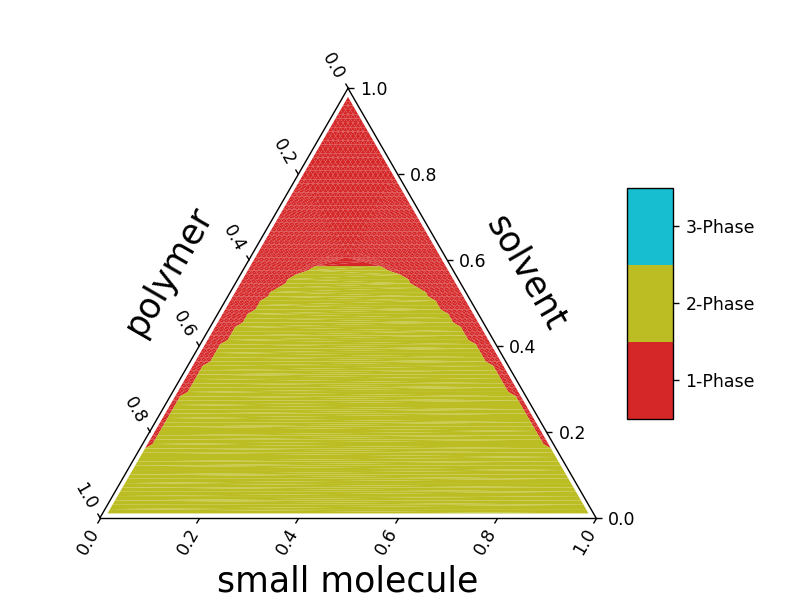

In [5]:
phase.plot_mpltern(engine.grid, engine.simplices, engine.num_comps)
plt.show()

<IPython.core.display.Javascript object>


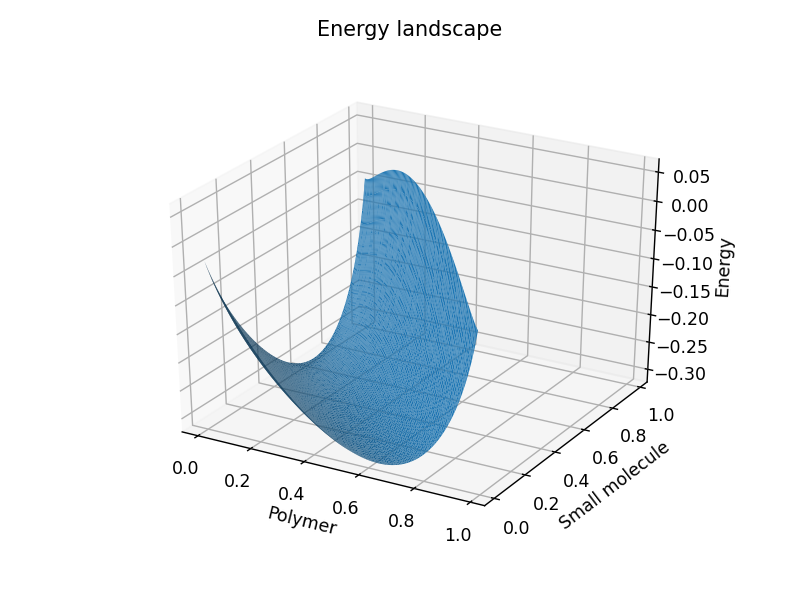

In [6]:
fig,ax = plt.subplots(subplot_kw={'projection':'3d'})
phase.plot_energy_landscape(engine.as_dict(), mode='full', ax = ax)
plt.show()

In [56]:
for _ in range(10):
    test = phase.TestEpiGraph(engine.as_dict(),f,phase=2,**engine.get_kwargs())
    
    if test.is_epigraph():
        print('{} simplex PASSES epigraph test'.format(test.rnd_simplex))
    else:
        print('{} simplex FAILS epigraph test'.format(test.rnd_simplex))
    
    # check for phase splits test
    results = []
    for p in test.interval.T:
        x, _, num_comps = engine(p)
        is_match = np.isclose(x,np.zeros(engine.dimension)).any()
        if not is_match:
            break
        results.append(is_match)

    if np.asarray(results).all():
        print('{} simplex labelling is CORRECT'.format(test.rnd_simplex))
    else:
        print('{} simplex labelling is WRONG'.format(test.rnd_simplex))

[3678  632 3625] simplex PASSES epigraph test
[3678  632 3625] simplex labelling is CORRECT
[ 989 2915  990] simplex PASSES epigraph test
[ 989 2915  990] simplex labelling is CORRECT
[4915  184  185] simplex PASSES epigraph test
[4915  184  185] simplex labelling is CORRECT
[5015  192  193] simplex PASSES epigraph test
[5015  192  193] simplex labelling is CORRECT
[3830  542  541] simplex PASSES epigraph test
[3830  542  541] simplex labelling is CORRECT
[4423  361 4387] simplex PASSES epigraph test
[4423  361 4387] simplex labelling is CORRECT
[4727  275  274] simplex PASSES epigraph test
[4727  275  274] simplex labelling is CORRECT
[ 812 3346 3228] simplex PASSES epigraph test
[ 812 3346 3228] simplex labelling is CORRECT
[ 194 5030 5036] simplex PASSES epigraph test
[ 194 5030 5036] simplex labelling is CORRECT
[ 449  450 4064] simplex PASSES epigraph test
[ 449  450 4064] simplex labelling is CORRECT
